In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
X, y = datasets.load_digits(return_X_y=True)

In [4]:
y = (y > 4).astype(int)

In [5]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)

In [6]:
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

In [7]:
l1_ratio = 0.5 

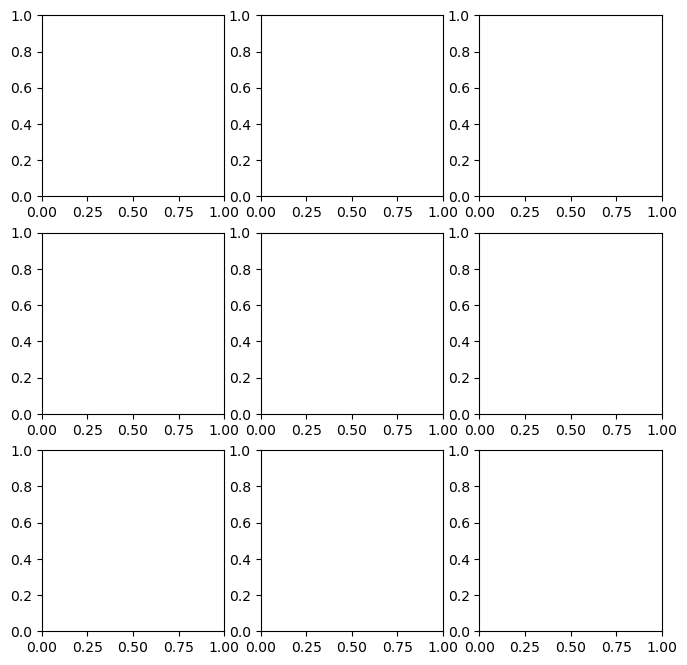

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

In [9]:
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    clf_l1_LR = LogisticRegression(
        C=C, penalty="l1", solver="saga", tol=0.01, max_iter=1000, random_state=42)
    clf_en_LR = LogisticRegression(
        C=C, penalty="elasticnet", l1_ratio=l1_ratio, solver="saga",
        tol=0.01, max_iter=1000, random_state=42)
    clf_l2_LR = LogisticRegression(
        C=C, penalty="l2", solver="saga", tol=0.01, max_iter=1000, random_state=42)

In [10]:
clf_l1_LR.fit(trainX, trainy)
clf_en_LR.fit(trainX, trainy)
clf_l2_LR.fit(trainX, trainy)

,penalty,'l2'
,dual,False
,tol,0.01
,C,0.01
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'saga'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
coef_l1_LR = clf_l1_LR.coef_.ravel()
coef_en_LR = clf_en_LR.coef_.ravel()
coef_l2_LR = clf_l2_LR.coef_.ravel()

In [12]:
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
sparsity_en_LR = np.mean(coef_en_LR == 0) * 100
sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100

In [13]:
print(f"C={C:.2f}")
print(f"{'Sparsity with L1 penalty:':<40} {sparsity_l1_LR:.2f}%")
print(f"{'Sparsity with Elastic-Net penalty:':<40} {sparsity_en_LR:.2f}%")
print(f"{'Sparsity with L2 penalty:':<40} {sparsity_l2_LR:.2f}%")
print(f"{'Score with L1 penalty:':<40} {clf_l1_LR.score(testX, testy):.2f}")
print(f"{'Score with Elastic-Net penalty:':<40} {clf_en_LR.score(testX, testy):.2f}")
print(f"{'Score with L2 penalty:':<40} {clf_l2_LR.score(testX, testy):.2f}")

C=0.01
Sparsity with L1 penalty:                87.50%
Sparsity with Elastic-Net penalty:       76.56%
Sparsity with L2 penalty:                6.25%
Score with L1 penalty:                   0.74
Score with Elastic-Net penalty:          0.86
Score with L2 penalty:                   0.89


In [16]:
if i == 0:
    axes_row[0].set_title("L1 penalty")
    axes_row[1].set_title(f"Elastic-Net\nl1_ratio = {l1_ratio}")
    axes_row[2].set_title("L2 penalty")
for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
    ax.imshow(
        np.abs(coefs.reshape(8, 8)),
        interpolation="nearest",
        cmap="binary",
        vmax=1,
        vmin=0,
        )
    ax.set_xticks(())
    ax.set_yticks(())

In [17]:
axes_row[0].set_ylabel(f"C = {C}")

Text(4.444444444444445, 0.5, 'C = 0.01')

In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>